# 统计表格，并完成三个问题

## 问题一：各部门人数

### 第一步：首先导入需要用到的包

In [10]:
import pandas as pd  #数据处理包，需要安装:pip install pandas
import re  #正则表达式包

### 第二步：读取数据并查看

In [17]:
employeeList = [['10932','张珊','管理','zhans@163.com','18612345678','520125197907167551'],
['10933','李思','软件','lisi@163.com','18612345679','510110195512176250'],
['10934','王武','财务','wangwu@example.com','18612345680','510102196510255826'],
['10935','赵柳','财务','zhaoliu@163.com','18612345681','510115195810287715'],
['10936','钱棋','人事','qianqi@example.com','18612345682','510103196707165650'],
['10941','张明','管理','zhangming@example.com','18612345683','510105198112166015'],
['10942','赵敏','人事','zhaomin@163.com','18612345684','510105198505225815'],
['10945','王红','培训','wanghong@example.com','18612345685','510221196208516555'],
['10946','李萧','培训','lixiao@example.com','18612345686','510221196601510810'],
['10947','孙科','软件','sunke@163.com','18612345687','510105198507025519'],
['10948','刘利','软件','liuli@example.com','18612345688','510227197510280527']]
index = ['编号','姓名','部门','电子邮箱','电话号码','身份证号码']
data = pd.DataFrame(employeeList,columns=index)
data.head()

,编号,姓名,部门,电子邮箱,电话号码,身份证号码
0,10932,张珊,管理,zhans@163.com,18612345678,520125197907167551
1,10933,李思,软件,lisi@163.com,18612345679,510110195512176250
2,10934,王武,财务,wangwu@example.com,18612345680,510102196510255826
3,10935,赵柳,财务,zhaoliu@163.com,18612345681,510115195810287715
4,10936,钱棋,人事,qianqi@example.com,18612345682,510103196707165650


In [18]:
data.groupby(by='部门').count()['姓名']  #可以查看没个部门人数

部门
人事    2
培训    2
管理    2
财务    2
软件    3
Name: 姓名, dtype: int64

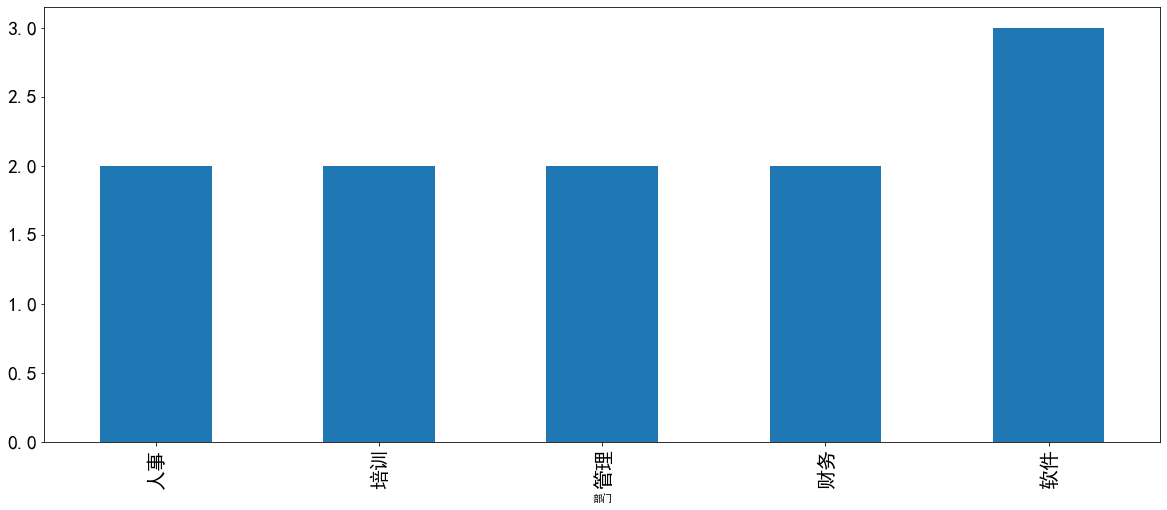

In [20]:
data.groupby(by='部门').count()['姓名'].plot(kind='bar',figsize=(20,8),fontsize=20)  #也可以画图柱状图查看没个部门人数，比较清晰

## 问题二： 使用163电子邮箱人数

### 第一步：引入辅助函数

In [53]:
def is_163_mail(text): #辅助函数，判断是否为163邮箱
    """
    使用163邮箱：True 
    没有使用163邮箱：False
    """
    if re.match(r'[0-9a-zA-Z_]{0,19}@163.com',text):
        return 1
    else:
        return 0

In [58]:
mail_list = data['电子邮箱'].values.tolist() #找到“电子邮箱”的数据并转换为数组
mail_list  #看一下结果

['zhans@163.com',
 'lisi@163.com',
 'wangwu@example.com',
 'zhaoliu@163.com',
 'qianqi@example.com',
 'zhangming@example.com',
 'zhaomin@163.com',
 'wanghong@example.com',
 'lixiao@example.com',
 'sunke@163.com',
 'liuli@example.com']

### 第二步：得到使用163邮箱人数的列表，使用为1，不使用为0

In [55]:
use163NumList = list(map(is_163_mail,mail_list))

In [40]:
use163NumList #查看结果

[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

In [43]:
print('使用163邮箱的人数是：',sum(use163NumList))

使用163邮箱的人数是： 5


## 问题三： 性别为男的员工人数

### 第一步：引入辅助函数

In [45]:
def is_male(id):  #辅助函数，根据身份证号码判断是否为男生
     """
     男生：1
     女生：0
     """
     num = int(id[16:17])
     if num % 2 == 0:
         return 0
     else:
         return 1

In [49]:
gender_list = data['身份证号码'].values.tolist() #找到“身份证号码”的数据并转换为数组
gender_list  #看一下结果

['520125197907167551',
 '510110195512176250',
 '510102196510255826',
 '510115195810287715',
 '510103196707165650',
 '510105198112166015',
 '510105198505225815',
 '510221196208516555',
 '510221196601510810',
 '510105198507025519',
 '510227197510280527']

### 第二步：得到性别为男的列表，是男性为1，不是用为0

In [50]:
isMaleNumList = list(map(is_male,gender_list))
isMaleNumList

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]

In [52]:
print('性别为男的员工人数是：',sum(isMaleNumList))

性别为男的员工人数是： 9
